# $P(k, H_0)$

Quick notebook to see how the power spectrum depends on $H_0$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model

%matplotlib inline

In [19]:
def get_pk(h):
    pars = camb.CAMBparams()

    pars.set_cosmology(H0=h*100, ombh2=0.04825 * h**2, omch2=(0.307 - 0.04825) * h**2)
    pars.InitPower.set_params(ns=0.9611)
    pars.set_matter_power(redshifts=[0.], kmax=40)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-3, maxkh=50, npoints = 200)

    return kh_nonlin, pk_nonlin[0]

kh_nonlin, pk_nonlin_reference = get_pk(0.705)

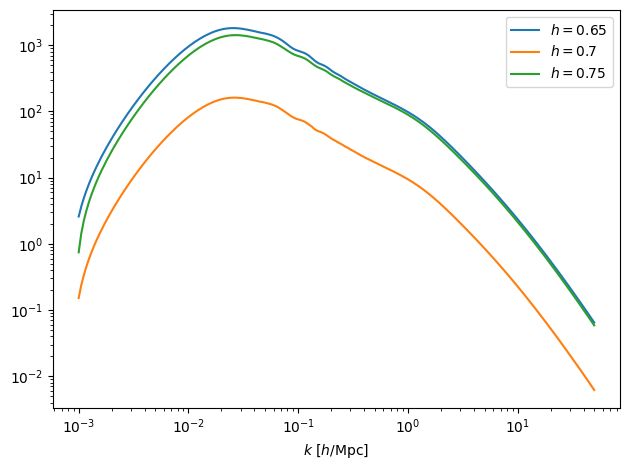

In [25]:
plt.figure()

for h in [0.65, 0.70, 0.75]:
    __, pk = get_pk(h)
    plt.plot(kh_nonlnie, pk / pk_nonlin_reference, label=r"$h = {}$".format(h))

plt.legend()
plt.xscale("log")
plt.xlabel(r"$k ~ [h / \mathrm{Mpc}]$")
plt.ylabel(r"$P(k, h) / P(k, h=0.705)$")

plt.tight_layout()
plt.savefig("../plots/pk_h0_dependence.png", dpi=450)
plt.show()